# Predicting house prices
## This template was provided by Coursera and has references to GraphLab Create. However, i have implemented the assignment using Numpy,Pandas and Sci-kit learn.
#Fire up graphlab create

### Import numpy, Pandas, MatplotLib, Seaborn

In [1]:
#import graphlab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
#sales = graphlab.SFrame('home_data.gl/')


filename = "./home_data.csv"
sales_df = pd.read_csv(filename)


In [3]:
sales_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### Describe the data read


In [4]:
#TODO: Omit certain columns here where the describe function does not make sense.
sales_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

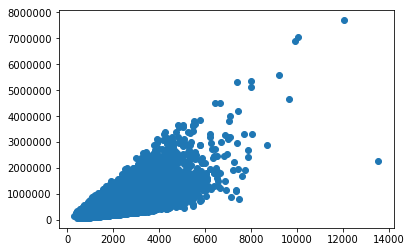

In [5]:
#graphlab.canvas.set_target('ipynb')
#sales.show(view="Scatter Plot", x="sqft_living", y="price")


plt.scatter(sales_df['sqft_living'], sales_df['price'])


### Split the data into training and testing sets

#We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let #GraphLab Create pick a random seed for you).  


In [6]:
#train_data,test_data = sales.random_split(.8,seed=0)

# Import scikit-learn
from sklearn.model_selection import train_test_split 
#Convert the data into numpy arrays
sqft_living = np.array(sales_df['sqft_living']).reshape(-1,1)
price = np.array(sales_df['price']).reshape(-1,1)
train_data_x,test_data_x,train_data_y, test_data_y = train_test_split(sqft_living, price,
                                                                      test_size=0.2, random_state = 0)


### Build the regression model using only sqft_living as a feature

In [7]:
#sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'],validation_set=None)

from sklearn.linear_model import LinearRegression
regressor_single_feature = LinearRegression()
regressor_single_feature.fit(train_data_x,train_data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Evaluate the simple model

In [8]:
test_data_y.mean()

529242.61068702291

### Get the coefficients

In [9]:
#print the intercept
print(regressor_single_feature.intercept_) 
#print the slope
print(regressor_single_feature.coef_)  

[-48257.06345556]
[[ 283.96855737]]


### Let's show what our predictions look like

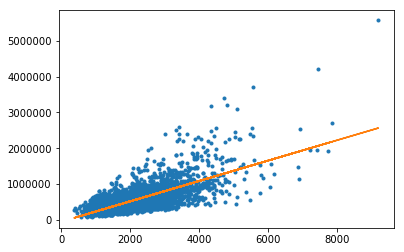

In [10]:
test_data_y_predicted = regressor_single_feature.predict(test_data_x)
plt.plot(test_data_x,test_data_y,'.',
        test_data_x,test_data_y_predicted,'-')


Above:  blue dots are original data, orange line is the prediction from the simple regression.


### Compare the actual and predicted values

In [11]:
#TODO: Good to have a sense of how our predicted values look compared to the actual values.
#df = pd.DataFrame([{'Actual': test_data_y, 'Predicted': test_data_y_predicted}]) 
#df

### Plot the distribution of price against the zipcode

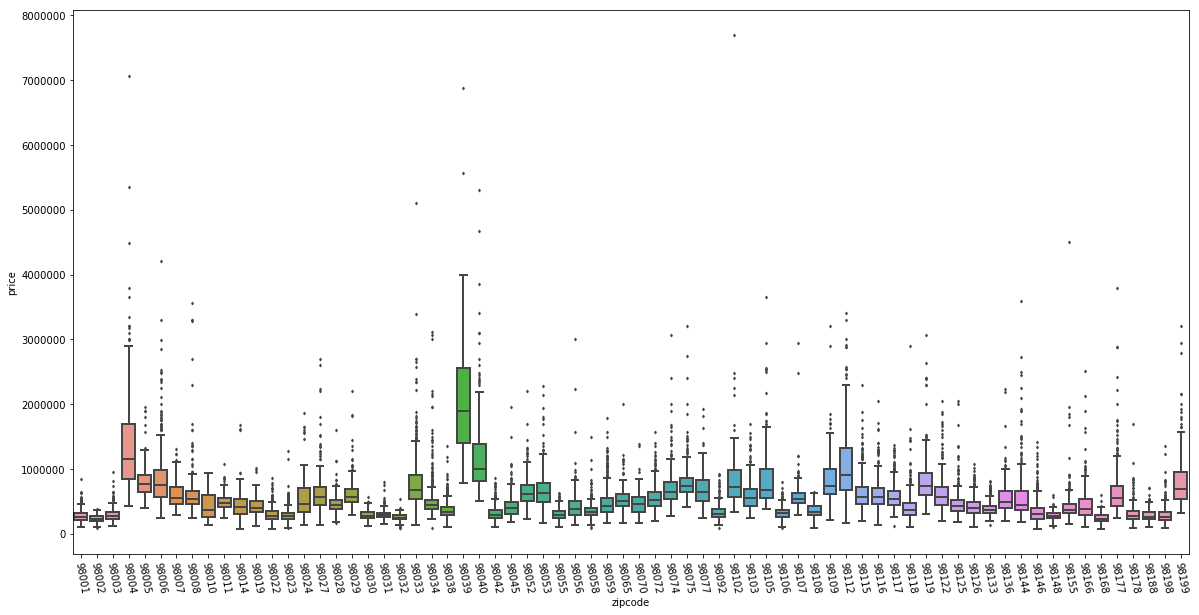

In [12]:
#sales.show(view='BoxWhisker Plot', x='zipcode', y='price')
#We visualize outliers and compare two datasets using Boxplots
plt.figure(figsize=(20,10))
ax = sns.boxplot(x='zipcode',y='price',data=sales_df,linewidth=2,fliersize=2)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=-80)
plt.show()

#TODO: Increase the size of the axis labels: zipcode and price

98039 is the most expensive zip code.

### Evaluate the model

In [13]:
#Calculate the RMSE of the model
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_data_y, test_data_y_predicted)))  

('Root Mean Squared Error:', 248879.06143647007)


### Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [14]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [15]:
sales_df[my_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074
5,4,4.50,5420,101930,1.0,98053
6,3,2.25,1715,6819,2.0,98003
7,3,1.50,1060,9711,1.0,98198
8,3,1.00,1780,7470,1.0,98146
9,3,2.50,1890,6560,2.0,98038


### Divide the data into training and testing sets based upon more features

In [16]:
#my_features_model = graphlab.linear_regression.create(train_data,target='price',features=my_features,validation_set=None)
house_features = sales_df[my_features]
train_data_x,test_data_x,train_data_y, test_data_y = train_test_split(house_features, price,
                                                                      test_size=0.2, random_state = 0)


### Build the regression model using multiple features

In [17]:
regressor_multiple_features = LinearRegression()
regressor_multiple_features.fit(train_data_x,train_data_y)
test_data_y_predicted = regressor_multiple_features.predict(test_data_x)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_data_y, test_data_y_predicted))) 

('Root Mean Squared Error:', 244004.77443104191)


### Comparing the results of the simple model(Single feature  vs multiple features)

For a single feature, the RMSE is 248879.06143647007

For multiple features, the RMSE is 244004.77443104191

The RMSE goes down from \$248, 879 to \$244, 004 with more features.

### Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [18]:
house1 = sales_df[sales_df['id']== 5309101200]

In [19]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [20]:
print house1['price']

1054    620000
Name: price, dtype: int64


In [21]:
#TODO: predict the price of the house using the model which has been trained using only a single feature.
#TODO: currently experiencing errors when i try to do that
house1_price = regressor_multiple_features.predict(house1[my_features])
print("Predicted price of house 1 is:{0}".format(house1_price))


Predicted price of house 1 is:[[ 637556.26515923]]


In [23]:
#print my_features_model.predict(house1)

### Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [24]:
house2 = sales_df[sales_df['id']== 1925069082]

In [25]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [26]:
#TODO: predict the price of the house using the model which has been trained using only a single feature.
house2_price = regressor_multiple_features.predict(house2[my_features])
print("Predicted price of house 2 is:{0}".format(house2_price))

Predicted price of house 2 is:[[ 1274443.76531348]]


### Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [27]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [28]:
#print my_features_model.predict(graphlab.SFrame(bill_gates))
#TODO: Needs to be completed.

### Quiz
1. Selection and summary statistics: In the notebook we covered in the module, we discovered which neighborhood (zip code) of Seattle had the highest average house sale price. Now, take the sales data, select only the houses with this zip code, and compute the average price. Save this result to answer the quiz at the end.

In [30]:
#98039 is the zip code which has the highest average house sale price.
sales_df_zipcode = sales_df[sales_df['zipcode'] == 98039]
sales_df_zipcode

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2974,3625049014,20140829T000000,2950000,4,3.50,4860,23885,2.0,0,0,...,12,4860,0,1996,0,98039,47.6172,-122.230,3580,16054
3761,2540700110,20150212T000000,1905000,4,3.50,4210,18564,2.0,0,0,...,11,4210,0,2001,0,98039,47.6206,-122.225,3520,18564
4077,3262300940,20141107T000000,875000,3,1.00,1220,8119,1.0,0,0,...,7,1220,0,1955,0,98039,47.6328,-122.236,1910,8119
4078,3262300940,20150210T000000,940000,3,1.00,1220,8119,1.0,0,0,...,7,1220,0,1955,0,98039,47.6328,-122.236,1910,8119
4149,6447300265,20141014T000000,4000000,4,5.50,7080,16573,2.0,0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996
4411,2470100110,20140804T000000,5570000,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4791,2210500019,20150324T000000,937500,3,1.00,1320,8500,1.0,0,0,...,7,1320,0,1954,0,98039,47.6187,-122.226,2790,10800
5178,6447300345,20150406T000000,1160000,4,3.00,2680,15438,2.0,0,2,...,8,2680,0,1902,1956,98039,47.6109,-122.226,4480,14406
5589,6447300225,20141106T000000,1880000,3,2.75,2620,17919,1.0,0,1,...,9,2620,0,1949,0,98039,47.6144,-122.228,3400,14400
5880,2525049148,20141007T000000,3418800,5,5.00,5450,20412,2.0,0,0,...,11,5450,0,2014,0,98039,47.6209,-122.237,3160,17825


### Describe the filtered dataset which contains houses with zipcode 98039

### Answer:

In [32]:
sales_df_zipcode.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+01,5.000000e+01,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.00000,50.000000,50.0,50.00000,50.000000,50.000000,50.000000
mean,3.755708e+09,2.160607e+06,4.060000,3.200000,3800.9000,17403.560000,1.560000,0.020000,0.440000,3.480000,9.560000,3290.900000,510.00000,1972.52000,398.600000,98039.0,47.62584,-122.233540,3132.200000,17291.100000
std,1.658802e+09,1.166477e+06,0.890081,1.366509,1764.5025,6655.224175,0.501427,0.141421,0.993037,0.579937,1.655664,1595.431517,714.84264,25.55765,805.319863,0.0,0.00886,0.004858,701.535604,5957.568571
min,2.210500e+09,7.875000e+05,2.000000,1.000000,1220.0000,6572.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1080.000000,0.00000,1902.00000,0.000000,98039.0,47.61020,-122.241000,1590.000000,8119.000000
25%,2.525049e+09,1.401000e+06,4.000000,2.250000,2680.0000,13797.500000,1.000000,0.000000,0.000000,3.000000,8.000000,2070.000000,0.00000,1954.00000,0.000000,98039.0,47.61875,-122.237000,2810.000000,14312.750000
50%,3.262301e+09,1.892500e+06,4.000000,3.000000,3560.0000,17188.500000,2.000000,0.000000,0.000000,3.000000,9.000000,3110.000000,0.00000,1966.00000,0.000000,98039.0,47.62390,-122.235500,3105.000000,16582.500000
75%,3.811127e+09,2.556250e+06,4.750000,3.687500,4452.5000,20052.250000,2.000000,0.000000,0.000000,4.000000,11.000000,4277.500000,1027.50000,1995.00000,0.000000,98039.0,47.63325,-122.229250,3567.500000,19855.000000
max,9.208900e+09,6.885000e+06,7.000000,7.750000,9890.0000,35069.000000,2.000000,1.000000,4.000000,5.000000,13.000000,8860.000000,3000.00000,2014.00000,2007.000000,98039.0,47.64130,-122.223000,4660.000000,42730.000000


### Second question

2.  Filtering data: One of the key features we used in our model was the number of square feet of living space (‘sqft_living’) in the house. For this part, we are going to use the idea of filtering (selecting) data.

    In particular, we are going to use logical filters to select rows of an SFrame. You can find more info in the Logical       Filter section of this documentation.
    Using such filters, first select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft.
    What fraction of the all houses have ‘sqft_living’ in this range? Save this result to answer the quiz at the end.

In [45]:
filtered_data = sales_df[(sales_df['sqft_living'] > 2000) & (sales_df['sqft_living'] < 4000)]
filtered_data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
10,1736800520,20150403T000000,662500,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,9297300055,20150124T000000,650000,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2524049179,20140826T000000,2000000,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
22,7137970340,20140703T000000,285000,5,2.50,2270,6300,2.0,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
24,3814700200,20141120T000000,329000,3,2.25,2450,6500,2.0,0,0,...,8,2450,0,1985,0,98030,47.3739,-122.172,2200,6865
26,1794500383,20140626T000000,937000,3,1.75,2450,2691,2.0,0,0,...,8,1750,700,1915,0,98119,47.6386,-122.360,1760,3573
29,1873100390,20150302T000000,719000,4,2.50,2570,7173,2.0,0,0,...,8,2570,0,2005,0,98052,47.7073,-122.110,2630,6026
30,8562750320,20141110T000000,580500,3,2.50,2320,3980,2.0,0,0,...,8,2320,0,2003,0,98027,47.5391,-122.070,2580,3980
32,461000390,20140624T000000,687500,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000


### Answer:

The fraction of all houses that have sqft_living in this range is : 9111/21613 = 0.4215

 3. Building a regression model with several more features: In the sample notebook, we built two regression models to predict house prices, one using just ‘sqft_living’ and the other one using a few more features, we called this set

Now, going back to the original dataset, you will build a model using the following features:

Note that using copy and paste from this webpage to the IPython Notebook sometimes does not work perfectly in some operating systems, especially on Windows. For example, the quotes defining strings may not paste correctly. Please check carefully if you use copy & paste.

    Compute the RMSE (root mean squared error) on the test_data for the model using just my_features, and for the one using advanced_features.

Note 1: both models must be trained on the original sales dataset, not the filtered one.

In [50]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

house_features_advanced = sales_df[advanced_features]
train_data_x,test_data_x,train_data_y, test_data_y = train_test_split(house_features_advanced, price,test_size=0.2, random_state = 0)

regressor_multiple_features_advanced = LinearRegression()
regressor_multiple_features_advanced.fit(train_data_x,train_data_y)
test_data_y_predicted = regressor_multiple_features_advanced.predict(test_data_x)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_data_y, test_data_y_predicted)))                                                                       


('Root Mean Squared Error:', 190473.37570967388)
